# Projet 7 : Réalisez des indexations automatiques d’images
# <u>B. Classification des images avec méthodes supervisées</u> <br/>

In [34]:
import cv2
import numpy as np
import pandas as pd
import scipy
from scipy.misc import imread
import matplotlib.pyplot as plt


In [8]:
print('OpenCV Version',cv2.__version__)

OpenCV Version 3.4.1


In [3]:
DATA_DIR = 'data'
TRAIN_DIR = DATA_DIR + '/train'
TEST_DIR = DATA_DIR + '/test'

In [17]:
train_labels = pd.read_csv(TRAIN_DIR + '/labels.csv',index_col=0, header=0)

In [22]:
train_labels.head()

,id,breed,folder
0,n02085620_5927,Chihuahua,n02085620-Chihuahua
1,n02085620_4441,Chihuahua,n02085620-Chihuahua
2,n02085620_1502,Chihuahua,n02085620-Chihuahua
3,n02085620_1916,Chihuahua,n02085620-Chihuahua
4,n02085620_13151,Chihuahua,n02085620-Chihuahua


In [30]:
item = 0
image_path = TRAIN_DIR + '/'+ train_labels.loc[item]['folder'] + '/' + train_labels.loc[item]['id'] + '.jpg'

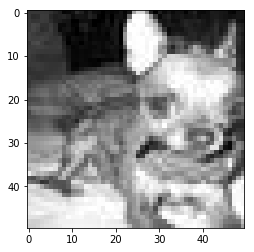

In [35]:
image = cv2.imread(image_path)
plt.imshow(image, cmap='gray');

In [38]:
def gen_sift_features(img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(img, None)
    return kp, desc

In [52]:
def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

In [53]:
kp, desc = gen_sift_features(image)

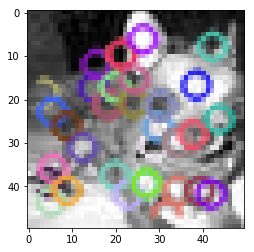

In [54]:
show_sift_features(image, image, kp)